# 1 step: Data Preprocessing

In [5]:
import pandas as pd

file_path = "creditcard.csv" 
data = pd.read_csv(file_path)

print("Первые 5 строк набора данных:")
print(data.head())

Первые 5 строк набора данных:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

  

In [6]:
print("\nОбщая информация о наборе данных:")
print(data.info())


Общая информация о наборе данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     28480

In [7]:
print(f"\nРазмеры набора данных: {data.shape}")


Размеры набора данных: (284807, 31)


In [8]:
print("\nПроверка пропущенных значений в наборе данных:")
print(data.isnull().sum())


Проверка пропущенных значений в наборе данных:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [9]:
print("\nКоличество дублированных строк в наборе данных:", data.duplicated().sum())


Количество дублированных строк в наборе данных: 1081


In [10]:
from sklearn.preprocessing import StandardScaler

# Масштабирование признака `Amount`
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

# Проверка результатов масштабирования
print("\nПервые 5 строк после масштабирования признака `Amount`:")
print(data[['Amount']].head())


Первые 5 строк после масштабирования признака `Amount`:
     Amount
0  0.244964
1 -0.342475
2  1.160686
3  0.140534
4 -0.073403


In [11]:
# Проверка распределения классов
print("\nРаспределение классов в исходном наборе данных:")
print(data['Class'].value_counts())


Распределение классов в исходном наборе данных:
Class
0    284315
1       492
Name: count, dtype: int64


In [14]:
# Удаление строк с пропущенными значениями
data_cleaned = data.dropna()

# Удаление дублированных строк
data_cleaned = data_cleaned.drop_duplicates()

# Проверка новых размеров набора данных после очистки
print(f"Размеры набора данных после очистки: {data_cleaned.shape}")

# Проверка распределения классов после очистки
print("\nРаспределение классов в очищенном наборе данных:")
print(data_cleaned['Class'].value_counts())

Размеры набора данных после очистки: (283726, 31)

Распределение классов в очищенном наборе данных:
Class
0    283253
1       473
Name: count, dtype: int64


In [17]:
from sklearn.utils import resample
import numpy as np

# Разделение данных на две группы: легальные и мошеннические транзакции
legitimate = data_cleaned[data_cleaned['Class'] == 0]
fraudulent = data_cleaned[data_cleaned['Class'] == 1]

# Уменьшение числа легальных транзакций до размера мошеннических (undersampling)
legitimate_downsampled = resample(legitimate,
                                  replace=False,  # без замены
                                  n_samples=len(fraudulent),  # размер выборки равен количеству мошеннических транзакций
                                  random_state=42)

# Соединение уменьшенных легальных транзакций с мошенническими
data_balanced = pd.concat([legitimate_downsampled, fraudulent])

# Проверка нового распределения классов
print("\nРаспределение классов в сбалансированном наборе данных:")
print(data_balanced['Class'].value_counts())

# Новые размеры набора данных
print(f"Размеры набора данных после балансировки: {data_balanced.shape}")


Распределение классов в сбалансированном наборе данных:
Class
0    473
1    473
Name: count, dtype: int64
Размеры набора данных после балансировки: (946, 31)


# 2 step: Data Exploration and Visualization (EDA)

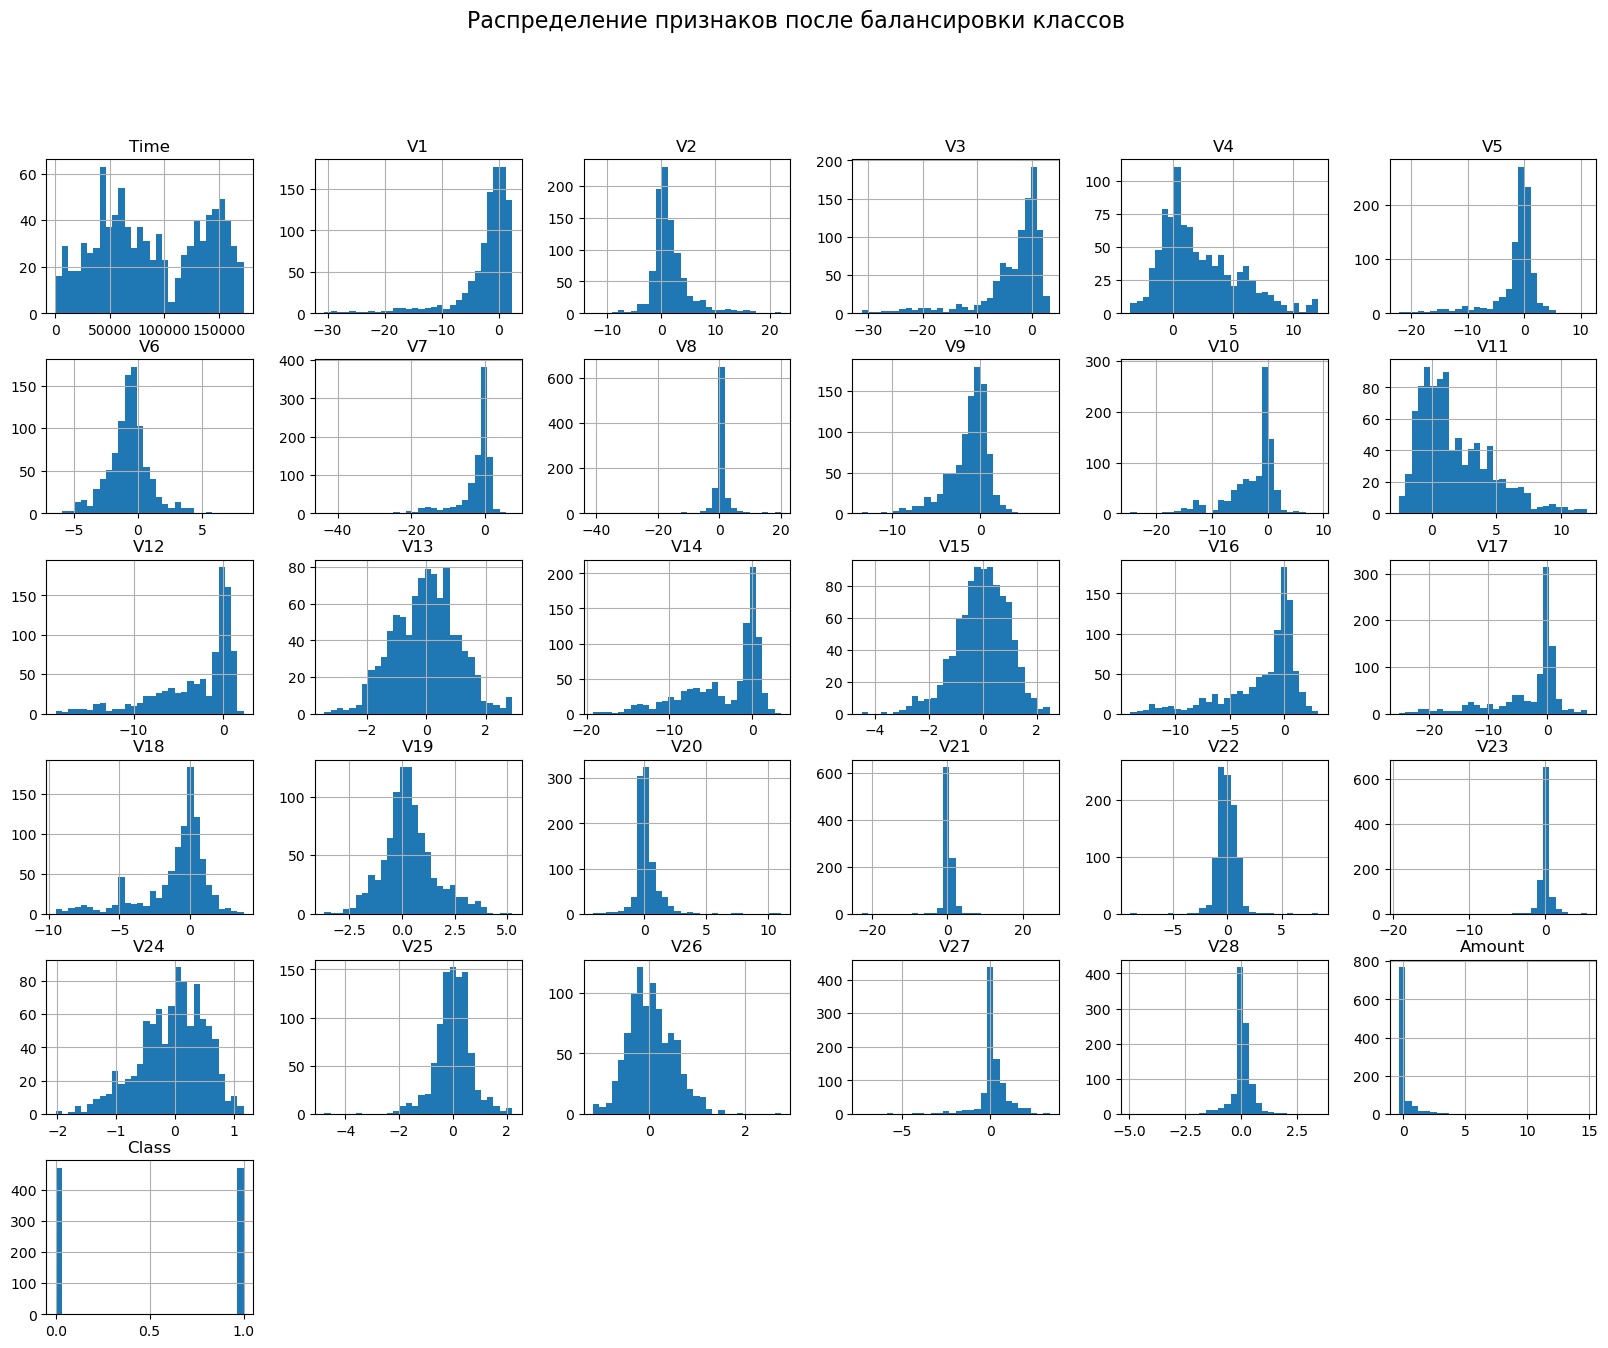

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


# Гистограммы распределения признаков для сбалансированных данных
data_balanced.hist(bins=30, figsize=(20, 15))
plt.suptitle("Распределение признаков после балансировки классов", fontsize=16)
plt.show()

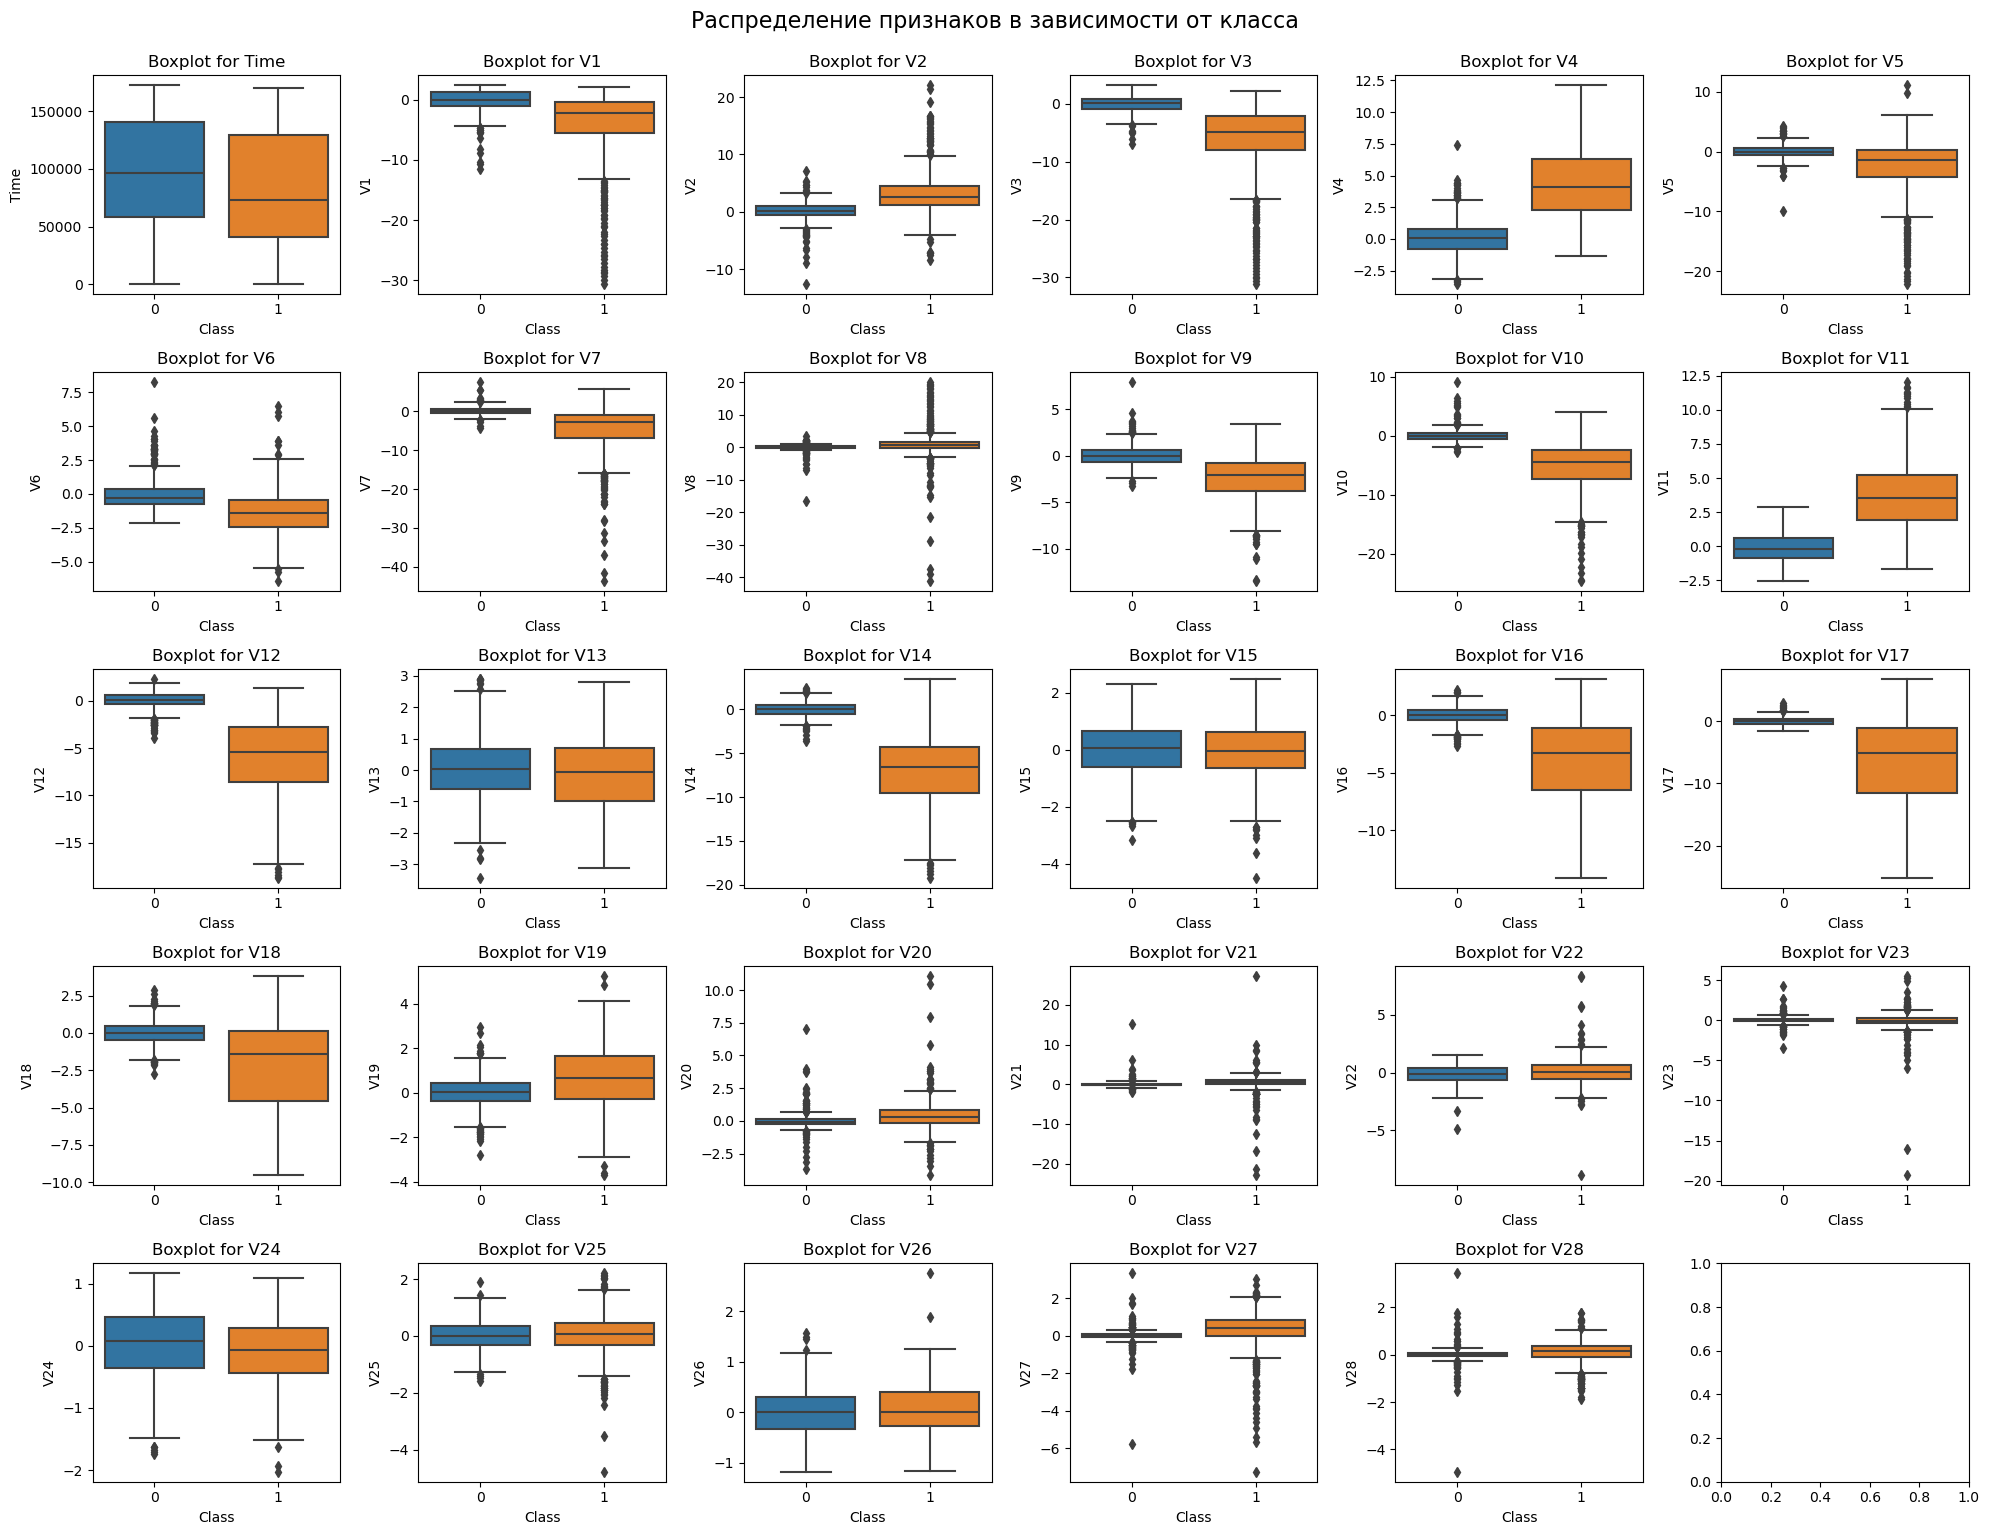

In [21]:
# Обновленная сетка подграфиков с достаточным количеством ячеек
fig, ax = plt.subplots(5, 6, figsize=(20, 15))  # 5 строк и 6 столбцов = 30 подграфиков
ax = ax.flatten()  # Преобразуем в одномерный массив

# Построение boxplot для каждого признака
for i, col in enumerate(data_balanced.columns[:-2]):  # Последние два столбца — Amount и Class
    sns.boxplot(x='Class', y=col, data=data_balanced, ax=ax[i])
    ax[i].set_title(f'Boxplot for {col}')

# Оформление диаграммы
plt.tight_layout()
plt.suptitle("Распределение признаков в зависимости от класса", fontsize=16, y=1.02)
plt.show()

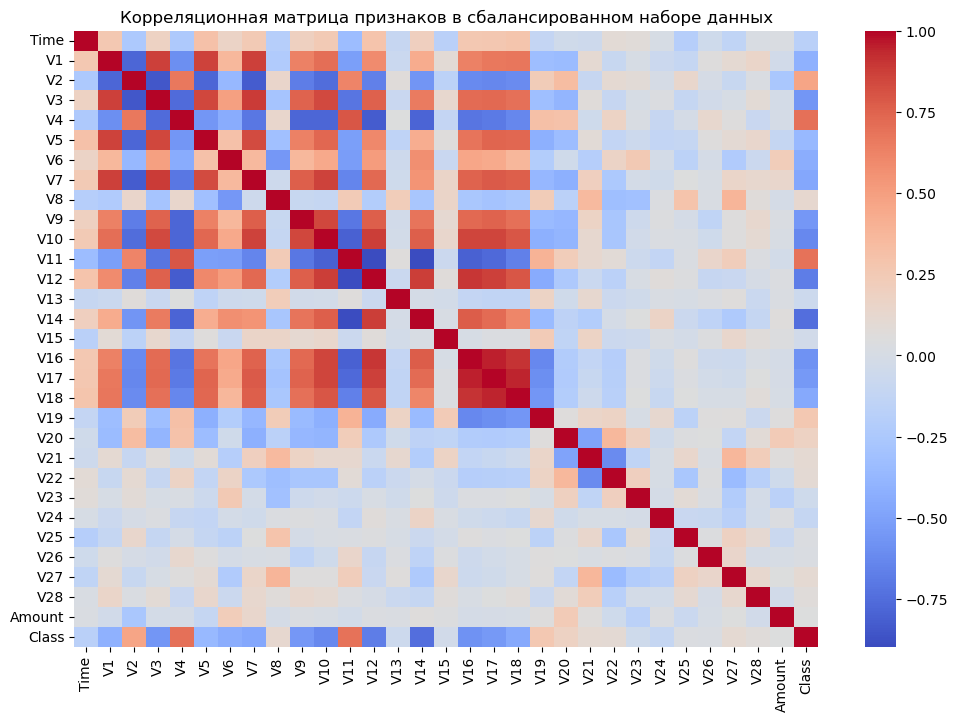

In [22]:
# Построение корреляционной матрицы
plt.figure(figsize=(12, 8))
corr_matrix = data_balanced.corr()  # Корреляционная матрица для сбалансированных данных

# Визуализация корреляционной матрицы с помощью heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Корреляционная матрица признаков в сбалансированном наборе данных")
plt.show()

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

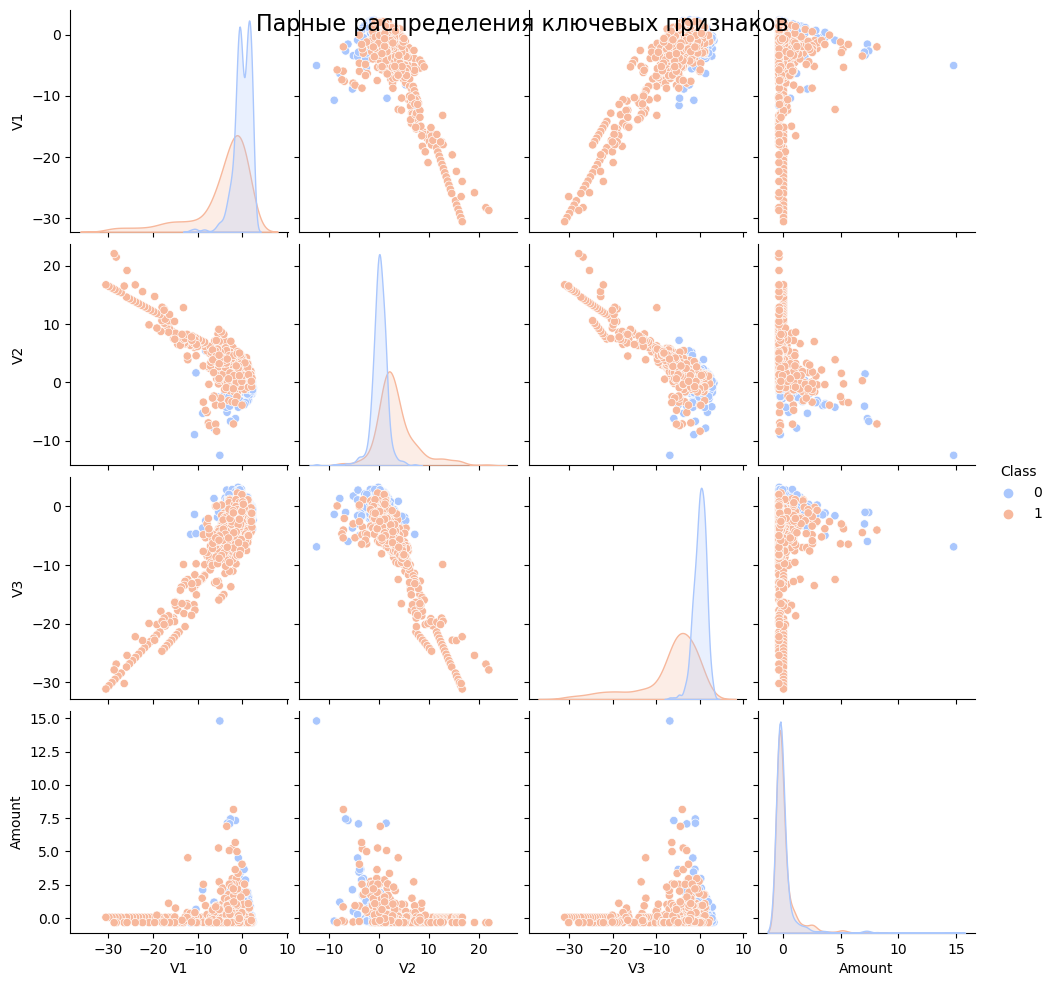

In [23]:
# Визуализация зависимостей между признаками с учетом класса
sns.pairplot(data_balanced, vars=['V1', 'V2', 'V3', 'Amount'], hue='Class', palette='coolwarm')
plt.suptitle("Парные распределения ключевых признаков", fontsize=16)
plt.show()

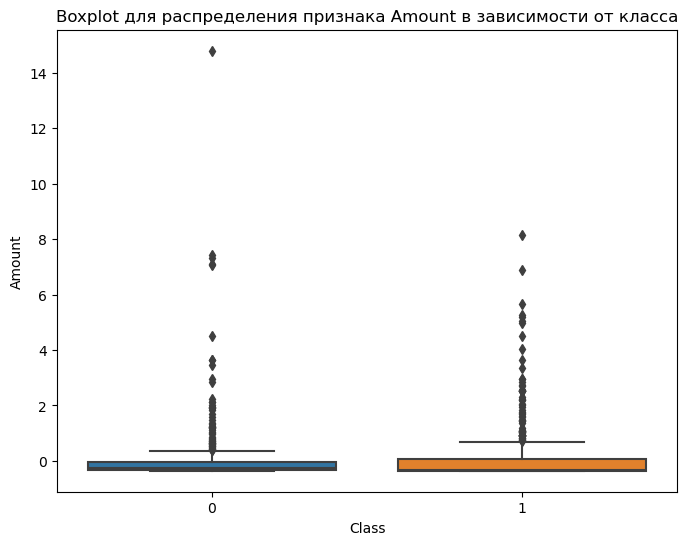

In [24]:
# Boxplot для визуализации выбросов в признаке `Amount`
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=data_balanced)
plt.title('Boxplot для распределения признака Amount в зависимости от класса')
plt.show()

# 4 step: Anomaly Detection Techniques

In [28]:
import numpy as np

# Применение Z-score для признака 'Amount'
z_scores = np.abs((data_balanced['Amount'] - data_balanced['Amount'].mean()) / data_balanced['Amount'].std())

# Установка порога для определения аномалий (например, Z-score > 3)
threshold = 3
anomalies_z_score = data_balanced[z_scores > threshold]

# Печать результатов
print(f"Количество аномалий, обнаруженных с использованием Z-score: {len(anomalies_z_score)}")
print("\nПримеры аномалий:")
print(anomalies_z_score.head())


Количество аномалий, обнаруженных с использованием Z-score: 19

Примеры аномалий:
            Time        V1        V2        V3        V4        V5        V6  \
208585  137185.0 -1.558325 -6.234558 -5.991017  0.694127  1.281775  3.332127   
111288   72173.0 -0.456299 -3.670986 -1.150640 -0.241709 -1.208356  0.589253   
87955    61918.0 -0.405584 -4.002349 -1.465189 -0.919401 -0.012099  4.092559   
45370    42309.0 -0.911807 -4.290661 -1.612868  0.279439 -1.415254  0.337204   
24928    33443.0 -2.673908 -6.701322 -1.051303  1.778515 -2.710568  1.597223   

              V7        V8        V9  ...       V21       V22       V23  \
208585  2.895165 -0.073248 -0.492135  ...  1.413608 -0.206540 -1.817331   
111288  0.678061 -0.236510 -0.833264  ...  0.444406 -1.046903 -0.885919   
87955  -0.462583  0.766338 -0.366053  ...  0.692157 -0.240984 -0.879389   
45370   1.352943 -0.475711 -1.038431  ...  0.266828 -1.281185 -1.156238   
24928   1.634001  0.012946  0.721114  ...  1.044378 -1.138091 

In [29]:
!pip install keras tensorflow

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [48]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

# Определение размерности входных данных
input_dim = data_balanced.drop(['Class'], axis=1).shape[1]

# Построение модели автокодировщика
autoencoder = Sequential([
    Dense(14, activation='relu', input_shape=(input_dim,)),
    Dense(7, activation='relu'),
    Dense(14, activation='relu'),
    Dense(input_dim, activation='sigmoid')
])

autoencoder.compile(optimizer='adam', loss='mse')

# Обучение автокодировщика
X_train = data_balanced.drop(['Class'], axis=1).values
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)

# Предсказание и вычисление ошибки реконструкции
reconstructions = autoencoder.predict(X_train)
mse = np.mean(np.power(X_train - reconstructions, 2), axis=1)

# Установка порога для определения аномалий на основе 95-го процентиля
threshold = np.percentile(mse, 90)
anomalies_autoencoder = data_balanced[mse > threshold]

# Печать результатов
print(f"Количество аномалий, обнаруженных с использованием автокодировщика: {len(anomalies_autoencoder)}")
print("\nПримеры аномалий:")
print(anomalies_autoencoder.head())

Epoch 1/50


/home/05d9e0b5-e474-451a-a785-c43c07155a4d/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 266825408.0000 - val_loss: 600799232.0000
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 292243648.0000 - val_loss: 600799232.0000
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 273329216.0000 - val_loss: 600799232.0000
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 267963472.0000 - val_loss: 600799232.0000
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 278854688.0000 - val_loss: 600799232.0000
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 281639200.0000 - val_loss: 600799232.0000
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 286670528.0000 - val_loss: 600799232.0000
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 288527520.0000 - val_loss: 600799232.0000
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 278093696.0000 - val_loss: 600799232.0000
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 275897888.0000 - val_loss: 600799232.0000
Epoch 11/5

# 5 step: Model Evaluation

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 346377184.0000 - val_loss: 304828416.0000
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 345195040.0000 - val_loss: 304828416.0000
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 333076480.0000 - val_loss: 304828416.0000
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 357280864.0000 - val_loss: 304828416.0000
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 327572064.0000 - val_loss: 304828416.0000
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 342132992.0000 - val_loss: 304828416.0000
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 343419424.0000 - val_loss: 304828416.0000
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 349164000.0000 - val_loss: 304828416.0000
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 357609216.0000 - val_loss: 304828416.0000
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 349569184.0000 - val_loss: 304828416.0000

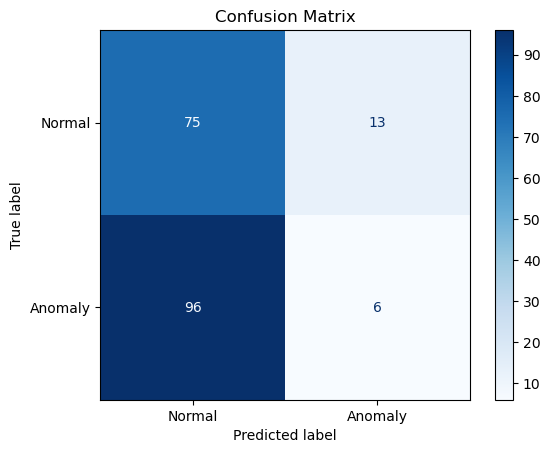

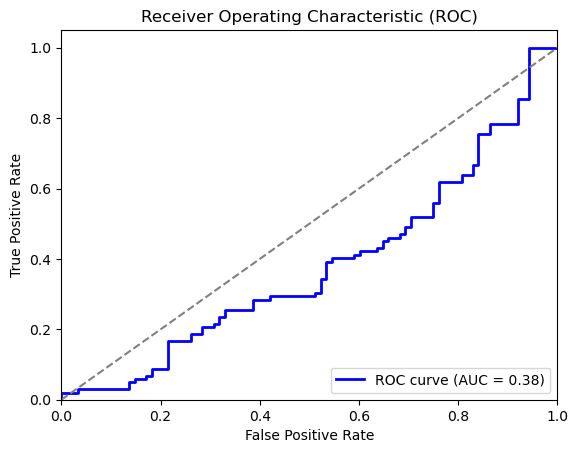

In [50]:
from sklearn.model_selection import train_test_split

# Разделение данных на признаки и целевую переменную
X = data_balanced.drop('Class', axis=1).values
y = data_balanced['Class'].values

# Разделение на тренировочные и тестовые наборы (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение автокодировщика на тренировочных данных
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)

# Вычисление ошибки реконструкции на тестовом наборе
reconstructions_test = autoencoder.predict(X_test)
mse_test = np.mean(np.power(X_test - reconstructions_test, 2), axis=1)

# Определение порога для классификации аномалий (можно использовать порог из обучающих данных)
threshold = np.percentile(mse_test, 90)
y_pred = (mse_test > threshold).astype(int)

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Расчет метрик
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

from sklearn.metrics import ConfusionMatrixDisplay

# Построение матрицы путаницы
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal', 'Anomaly'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Построение ROC-кривой
fpr, tpr, _ = roc_curve(y_test, mse_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

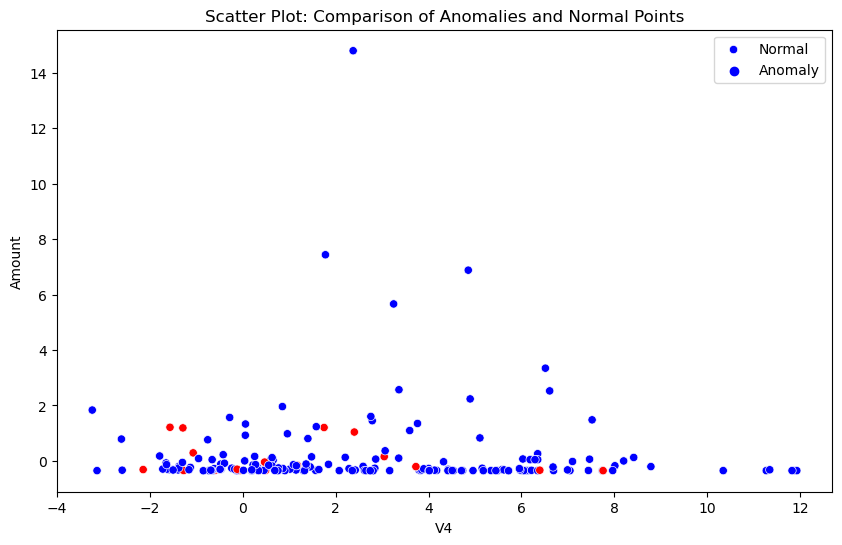

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Используем индексы из оригинального DataFrame data_balanced, соответствующие X_test
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(
    X, y, data_balanced.index, test_size=0.2, random_state=42
)

# Создаем копию DataFrame с использованием этих индексов
data_test = data_balanced.loc[indices_test].copy()
data_test['Anomaly'] = y_pred

# Выбираем два признака для визуализации
feature1 = 'V4'
feature2 = 'Amount'

# Построение scatter plot для визуализации аномалий
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_test, x=feature1, y=feature2, hue='Anomaly', palette={0: 'blue', 1: 'red'}, legend='full')
plt.title('Scatter Plot: Comparison of Anomalies and Normal Points')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend(['Normal', 'Anomaly'])
plt.show()


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


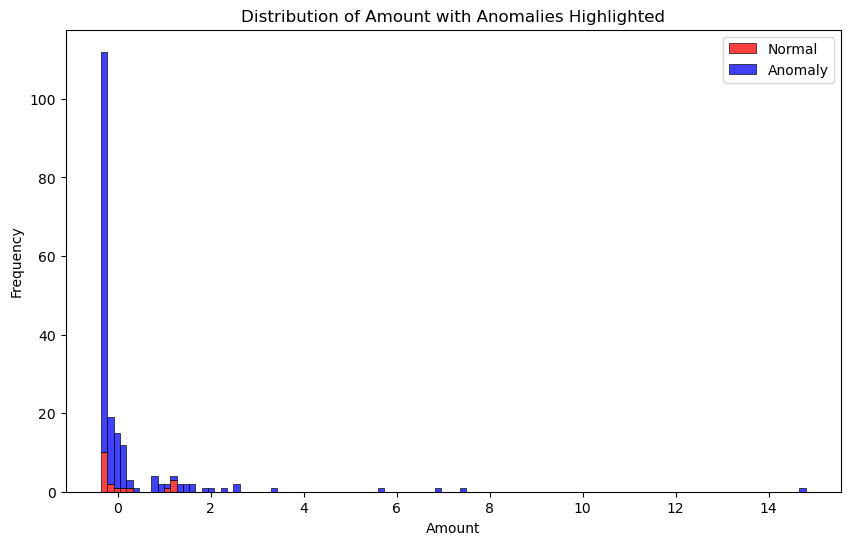

In [56]:
# Построение гистограммы для признака 'Amount'
plt.figure(figsize=(10, 6))
sns.histplot(data=data_test, x='Amount', hue='Anomaly', multiple='stack', palette={0: 'blue', 1: 'red'})
plt.title('Distribution of Amount with Anomalies Highlighted')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend(['Normal', 'Anomaly'])
plt.show()


# Exercise 2:

In [61]:
import pandas as pd

# Загрузка данных
data = pd.read_csv('weatherHistory.csv')

# Просмотр первых строк
print(data.head())

# Информация о наборе данных
print(data.info())

# Проверка статистики данных
print(data.describe())

                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13  

In [63]:
# Преобразование столбца 'Formatted Date' в формат datetime
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)

# Установка 'Formatted Date' в качестве индекса
data.set_index('Formatted Date', inplace=True)

# Обработка пропущенных значений
# Заполним пропущенные значения с использованием метода заполнения предыдущими значениями (forward fill)
data = data.ffill()

# Проверка, есть ли еще пропущенные значения
print(data.isnull().sum())

# Если необходимо, можем изменить частоту данных (например, до дневной)
# data = data.resample('D').mean()


Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


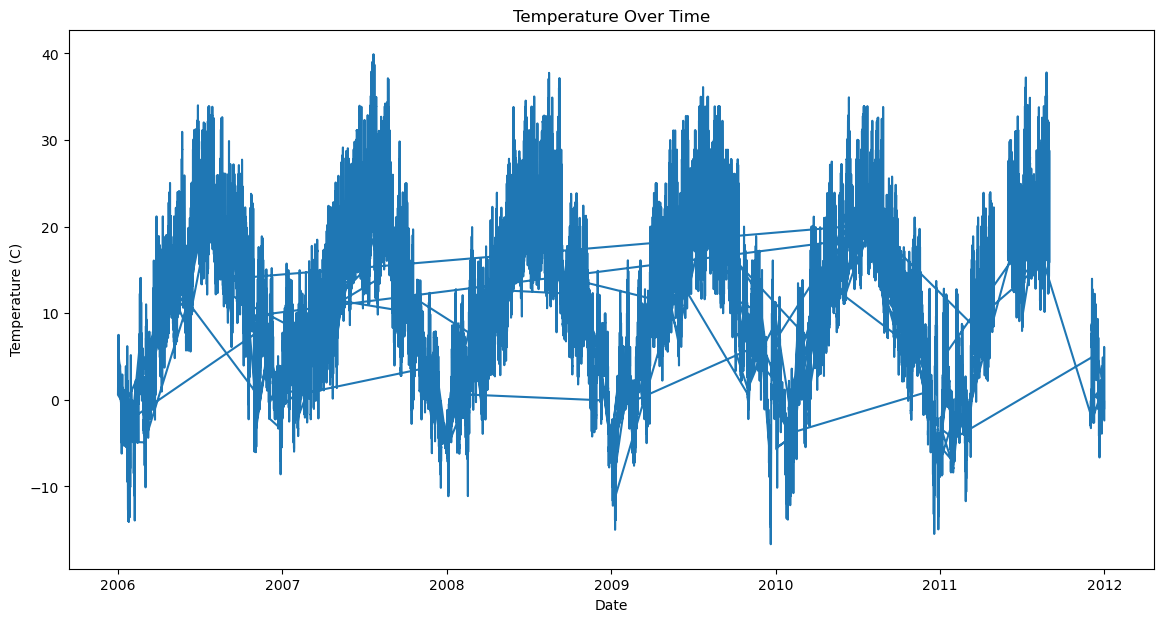

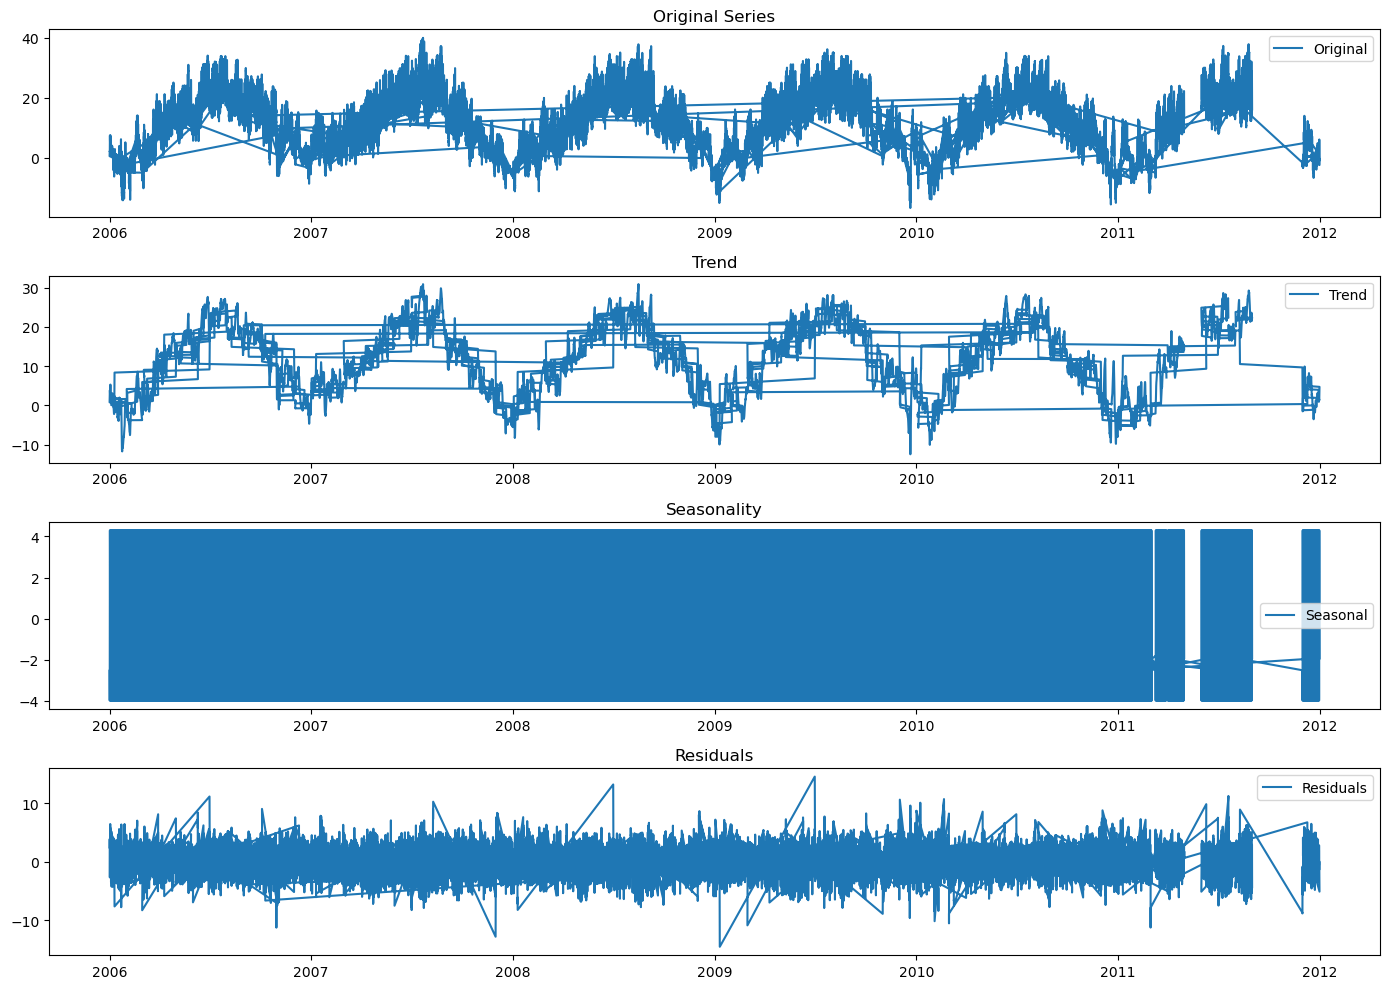

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Построение линейного графика для визуализации временного ряда
plt.figure(figsize=(14, 7))
plt.plot(data['Temperature (C)'])
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.show()

# 2. Сезонная декомпозиция временного ряда
decomposition = seasonal_decompose(data['Temperature (C)'], model='additive', period=24)  # Указан период 24 для почасовых данных
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Построение графиков декомпозиции
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(data['Temperature (C)'], label='Original')
plt.title('Original Series')
plt.legend()

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.title('Trend')
plt.legend()

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.title('Seasonality')
plt.legend()

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.title('Residuals')
plt.legend()

plt.tight_layout()
plt.show()


                               SARIMAX Results                                
Dep. Variable:        Temperature (C)   No. Observations:                49472
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -87586.165
Date:                Thu, 17 Oct 2024   AIC                         175182.329
Time:                        08:01:22   BIC                         175226.375
Sample:                             0   HQIC                        175196.133
                              - 49472                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9316      0.000   1.23e+04      0.000       1.931       1.932
ar.L2         -0.9997      0.000  -5963.257      0.000      -1.000      -0.999
ma.L1         -1.9127      0.001  -2102.470      0.0

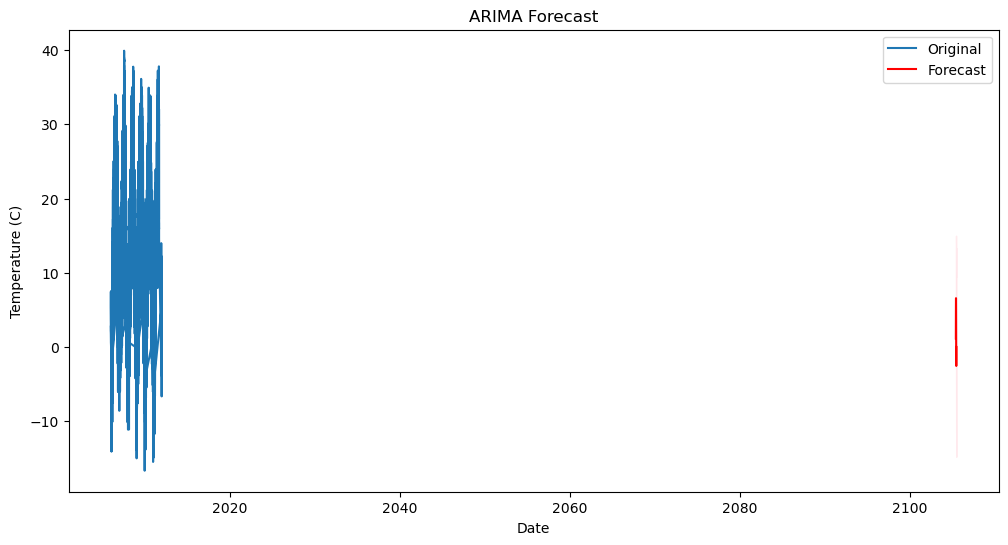

ARIMA - MAE: 11.20, RMSE: 13.76, R²: -1.06


In [74]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Определение параметров ARIMA (например, p=2, d=1, q=2)
p = 2  # Количество авторегрессивных лагов
d = 1  # Количество разностей для достижения стационарности
q = 2  # Количество лагов в скользящем среднем

# Создание и обучение модели ARIMA
arima_model = ARIMA(data['Temperature (C)'], order=(p, d, q))
arima_results = arima_model.fit()

# Вывод сводки модели
print(arima_results.summary())

# Прогнозирование на следующие 24 часа
forecast = arima_results.get_forecast(steps=24)
forecast_conf = forecast.conf_int()

# Визуализация прогноза
plt.figure(figsize=(12, 6))
plt.plot(data['Temperature (C)'], label='Original')
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(forecast_conf.index, forecast_conf.iloc[:, 0], forecast_conf.iloc[:, 1], color='pink', alpha=0.3)
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend()
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Прогноз на тестовом наборе
arima_forecast = arima_results.get_forecast(steps=len(X_test))
arima_pred = arima_forecast.predicted_mean

# Вычисление метрик для ARIMA
mae_arima = mean_absolute_error(y_test, arima_pred)
rmse_arima = np.sqrt(mean_squared_error(y_test, arima_pred))
r2_arima = r2_score(y_test, arima_pred)

print(f"ARIMA - MAE: {mae_arima:.2f}, RMSE: {rmse_arima:.2f}, R²: {r2_arima:.2f}")


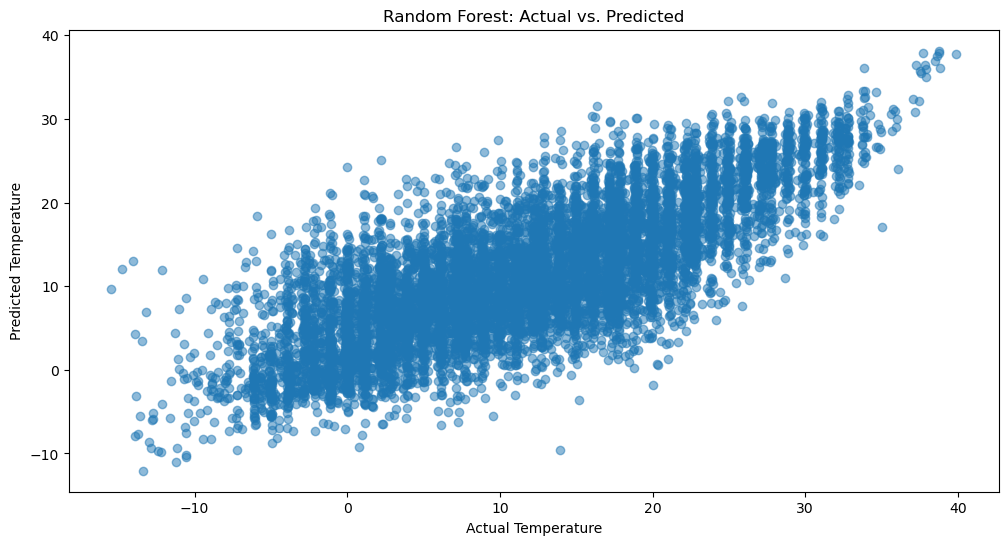

Random Forest - MAE: 4.75, RMSE: 6.10, R²: 0.60


In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Подготовка данных для модели
data_ml = data[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']].dropna()

X = data_ml[['Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']]
y = data_ml['Temperature (C)']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели случайного леса
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = rf_model.predict(X_test)

# Оценка модели
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Random Forest: Actual vs. Predicted')
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Прогноз на тестовой выборке (мы уже вычислили y_pred)
mae_rf = mean_absolute_error(y_test, y_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
r2_rf = r2_score(y_test, y_pred)

print(f"Random Forest - MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R²: {r2_rf:.2f}")




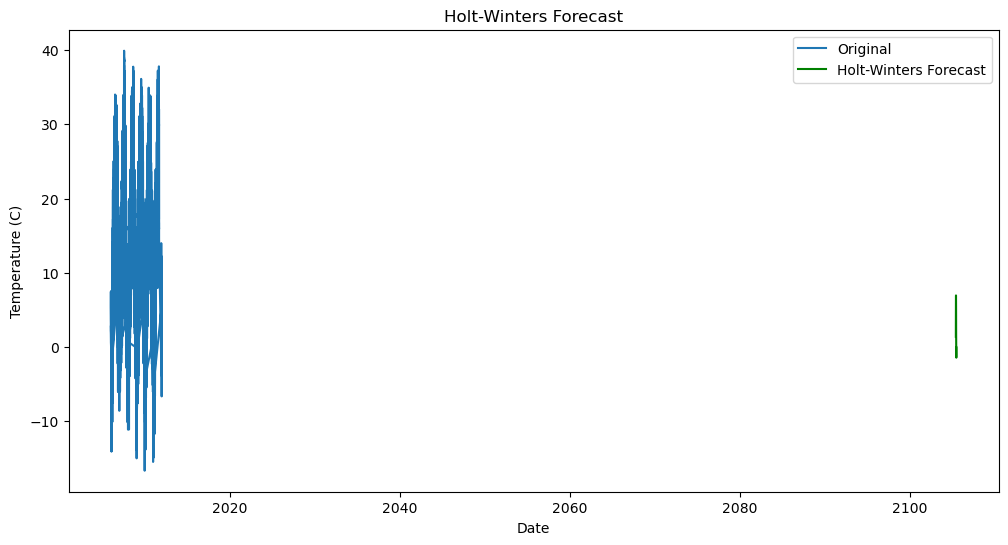

Holt-Winters - MAE: 21.56, RMSE: 24.58, R²: -5.57


In [76]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Создание и обучение модели экспоненциального сглаживания (Holt-Winters)
hw_model = ExponentialSmoothing(data['Temperature (C)'], trend='add', seasonal='add', seasonal_periods=24)
hw_results = hw_model.fit()

# Прогнозирование на следующие 24 часа
hw_forecast = hw_results.forecast(steps=24)

# Визуализация прогноза
plt.figure(figsize=(12, 6))
plt.plot(data['Temperature (C)'], label='Original')
plt.plot(hw_forecast, label='Holt-Winters Forecast', color='green')
plt.title('Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend()
plt.show()
# Прогноз на тестовом наборе
hw_pred = hw_results.forecast(steps=len(X_test))

# Вычисление метрик для модели Холта-Винтерса
mae_hw = mean_absolute_error(y_test, hw_pred)
rmse_hw = np.sqrt(mean_squared_error(y_test, hw_pred))
r2_hw = r2_score(y_test, hw_pred)

print(f"Holt-Winters - MAE: {mae_hw:.2f}, RMSE: {rmse_hw:.2f}, R²: {r2_hw:.2f}")

#Метод экспоненциального сглаживания основан на идее, что чем ближе значение данных к текущему моменту, тем более оно значимо для прогнозирования. 
#Это достигается с помощью экспоненциальных весов, которые уменьшаются с удалением от текущей точки во времени.